# analise de dados em avaliaçoes de Medicamentos

![Texto Alternativo](images/remedio.jpeg "Remedios")


# Introdução:
<br>
A análise de dados em revisões de pacientes sobre medicamentos é uma abordagem valiosa para compreender a eficácia, aceitação e impacto dos tratamentos na sociedade. A saúde pública é uma questão de crescente importância global, à medida que as populações enfrentam uma variedade de desafios relacionados a condições crônicas, doenças infecciosas e outros problemas de saúde. Nesse contexto, a utilização de medicamentos desempenha um papel crucial na gestão e tratamento dessas condições, influenciando diretamente a qualidade de vida dos pacientes.
<br>

## Desafios de Saúde Global:
![Texto Alternativo](images/saude_global.jpeg "Saúde")
<br>
O mundo contemporâneo enfrenta desafios significativos relacionados à saúde, como o aumento das taxas de doenças crônicas, resistência antimicrobiana e pandemias globais. O impacto desses desafios ressalta a importância de entender como os medicamentos são percebidos e experimentados pelos pacientes, além de avaliar sua eficácia no contexto da saúde pública.
<br>
<br>
## Uso de Medicamentos e Seus Impactos:

![Texto Alternativo](images/reme.jpeg "Remédio")

O uso de medicamentos é uma prática generalizada e fundamental na gestão de diversas condições de saúde. No entanto, a eficácia e aceitação de medicamentos podem variar consideravelmente entre os pacientes. A análise das revisões dos pacientes fornece insights valiosos sobre as experiências individuais, satisfação e efeitos colaterais, contribuindo assim para uma visão abrangente da eficácia de um medicamento em diferentes cenários.

<br>

## Dicionario de dados:

<br>


Variável |tipo| Definição | Dominio
---------|-------|-----------| -------
unamed0|int|identificação auto-incremental|
drugname | String| nome do Remedio|
condition|String|doença do paciente|
review|String|avaliação escrita|
rating|float|Nota do paciente| 0.0 a 10.0
date|String|data da avaliação
useful count|int|quantidade de usuarios que acharam a avaliação util|
<br>

# descrição dos Dados:

<br>
 <p>
    unamed0: é uma identificação autoincremental para cada usuario
    <p>
    <br>
     <p>
    drugname: Nome da medicação
    <p>
    <br>
        <p>
    condition: Doença do paciente utilizando o medicamento
            <p>
    <br>
                <p>
    review: é a avaliação escrita que o paciente dara ao remedio, junto a sua nota, com essa avaliação, podemos obter dados importantes para a avaliação do produto, como palavras-chave por exemplo
                    <p>
    <br>
                        <p>
    rating: é a nota que o paciente da ao remedio, de 0 a 10
                            <p>
    <br>
                                <p>
    date: é a data da avaliação, o que nos permite filtrar as avaliaçoes por ano e realizar analises temporais
                                    <p>
    <br>
    useful count: é a quantidade de pessoas que acharam aquela avaliação Util, funciona como um Like em uma rede social
   <p>
 <br>


## Análise de dados:
<br>
Nessa analise pretendemos utilizar os dados para recolher informaçoes como medicações utilizadas para tratar a mesma doença, com isso poderemos realizar comparaçoes de qual medicação se mostrou mais eficaz ao ver dos pacientes, quais possuem mais ou menos efeitos colaterais e avaliaçoes de uma medicação ao decorrer dos anos no Df, assim poderemos ver se a droga teve aumento ou declinio da efetividade nos pacientes
<br>

## O conjunto de dados:

<p>
Estamos Utilizando para essa analise, o conjunto de dados retirado do site oficial da universidade irvine da California, feita por Surya Kallumadi e Felix Grer para fins não lucrativos
<p>
<p>
A base recolhe reviews de diversas farmacias on-line da california. foi criada com a intenção de medir a satisfação geral de pacientes, que é o que iremos analisar aqui.
<p>

## Análise:

In [2]:
##realizando importação de bibliotecas que podem ser usadas no decorrer da analise
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [3]:
# Lê o arquivo TSV(table separated values) usando o delimitador '\t'
df = pd.read_csv("drugsComTrain_raw.tsv", delimiter='\t')

## Estatisticas de resumo da base de dados:
Agora que entendemos o contexto da analise, vamos começar utilizando o comando describe para identificar alguns aspectos da nossa base:

In [67]:
df.describe()

,Unnamed: 0,rating,usefulCount,year
count,161297.000000,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755,2013.944928
std,67004.445170,3.272329,36.403742,2.712442
min,2.000000,1.000000,0.000000,2008.000000
25%,58063.000000,5.000000,6.000000,2012.000000
50%,115744.000000,8.000000,16.000000,2015.000000
75%,173776.000000,10.000000,36.000000,2016.000000
max,232291.000000,10.000000,1291.000000,2017.000000


<h3>O quadro de dados resultante nos fornece estatísticas descritivas para todas as variáveis numéricas em nosso conjunto de dados.

Vamos dar uma olhada mais de perto no que cada variável significa:
<br>
  <p>
1.count(contagem): as 3 variaveis que contem variaveis numericas estão iguais, isso significa que elas não possuem dados nulos, o que pode é considerado um ponto positivo
    <p>
<br>
        <p>
2.mean(media): a media não deve ser considerada na coluna unamed0, pois ela é o id de cada paciente, não tendo motivo para ser analisada, já na coluna rating(nota) podemos ver que a nota media dada pelos pacientes aos remedios é 7, e na coluna Useful count que é a quantidade de usuarios que acharam aquela avaliação util, tem uma media de 28 pessoas
            <p>
<br>
                <p>
3.std ou desvio padrão: um desvio padrão de 3.28 sugerem que as notas dos pacientes têm uma tendência moderadamente positiva, mas também há uma quantidade significativa de variabilidade nas avaliações. Isso pode indicar uma diversidade de opiniões entre os pacientes em relação aos medicamentos.
                    <p>
<br>
                        <p>
4. Min: o Valor Minimo de cada variavel, na coluna rating podemos ver que a menor nota dada a um remedio foi de 1, já na useful count, tivemos avaliaçoes que tiveram 0 pessoas que acharam ela interessante.
                            <p>
<br>
                                <p>
5. Quartis: 25%, 50% e 75%: 1º quartil, 2º quartil (mediana) e 3º quartil.
                                    <p>
<br>
                                        <p>
6. Max: O valor maximo para cada variavel, podemos observar que a coluna rating possui um maximo de 10, o que indica que tiveram remedios que receberam a nota maxima, e na coluna useful count tivemos 1.291 pessoas que acharam a avaliação util
                                            <p>

### Vamos fazer um grafico de Correlação para vizualização:

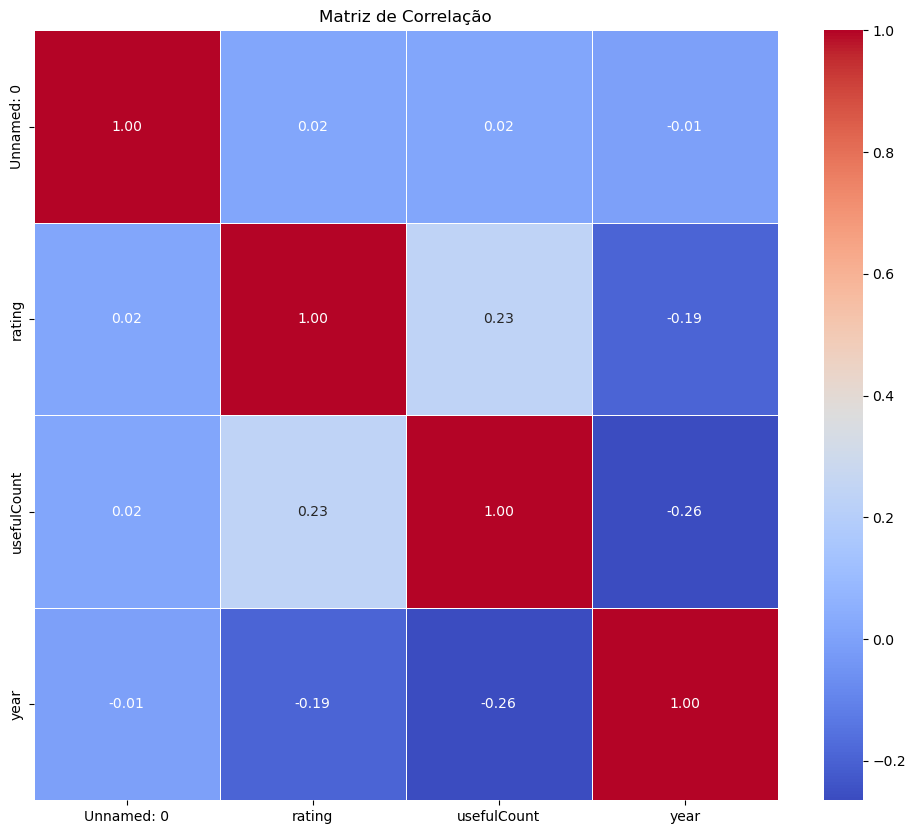

In [69]:
# Selecionar apenas variáveis numéricas
df_numeric = df.select_dtypes(include='number')

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Criar um mapa de calor usando o Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

### Vemos que nossa base não possui dados com correlação forte, devido a maior parte dos dados e os de mais relevancia, serem de texto

## vamos usar o df.head para ver algumas linhas do Df, para vizualiza-lo melhor:

In [4]:
df.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1


## na coluna date,que é a data, podemos perceber que ela não esta no formato correto para realizarmos as analises, vamos arruma-la

In [5]:
# Supondo que sua coluna de data seja chamada 'date' no DataFrame 'df'
df['date'] = pd.to_datetime(df['date'], format='%B %d, %Y')

## agora com a coluna de data formatada, vamos vizualizar o df novamente:

In [6]:
df.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,2015-11-28,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,2017-03-07,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,2015-03-14,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,2016-08-09,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,2016-12-08,1


## Agora que conseguimos arrumar a coluna de data, vamos descobrir qual a cobertura temporal dos nossos dados, iremos criar um novo df agrupando os anos e criando um grafico que ira mostrar quantas avaliaçoes tivemos a cada ano

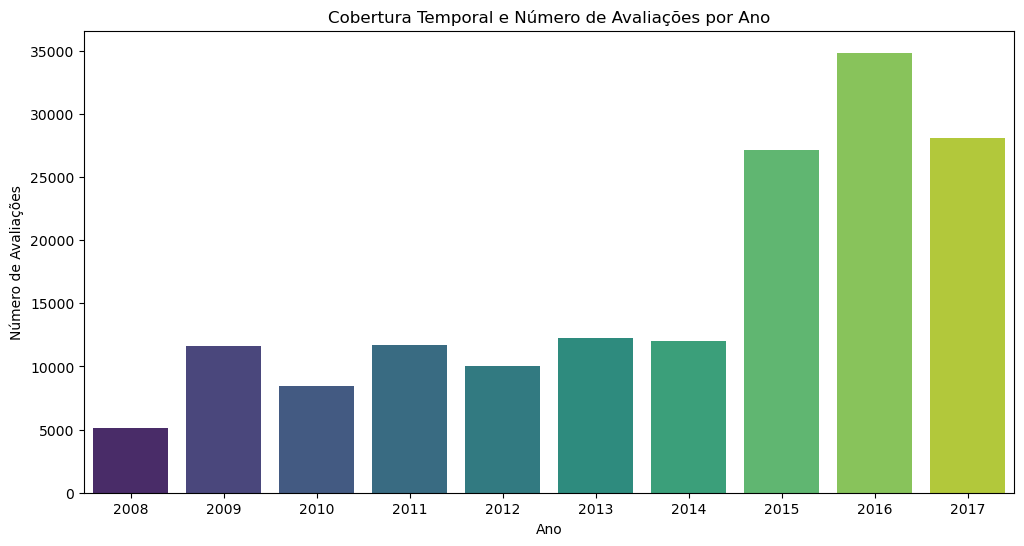

In [7]:
# Adicione uma coluna para o ano
df['year'] = df['date'].dt.year

# Contagem de avaliações por ano
avaliacoes_por_ano = df['year'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=avaliacoes_por_ano.index, y=avaliacoes_por_ano.values, palette="viridis")
plt.xlabel("Ano")
plt.ylabel("Número de Avaliações")
plt.title("Cobertura Temporal e Número de Avaliações por Ano")
plt.show()

## vemos que a partir de 2015, tivemos aumento significativo nas avaliaçoes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  float64       
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
 7   year         161297 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 9.8+ MB


## Utilizando o df.info, podemos ver que a coluna condition tem dados nulos, provavelmente proveniente de falhas na inserção de dados, Iremos corrigir isso para que nossa analise seja mais precisa

In [9]:
df.isnull().sum() #somatório de colunas com nulos e seus totais

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
year             0
dtype: int64

## podemos ver que a coluna condition possui 899 campos nulos, criaremos uma copia do dataframe para excluir as linhas com nulos

In [10]:
df2 = df.copy() #cópia do data frame

## decidimos excluir as linhas que contem os registros nulos, pois não podemos preencher a coluna de condição com algo que não temos certeza se realmente era a condição do paciente

In [11]:
df2 = df2.dropna() #apaga as linhas que contém dados nulos

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   160398 non-null  int64         
 1   drugName     160398 non-null  object        
 2   condition    160398 non-null  object        
 3   review       160398 non-null  object        
 4   rating       160398 non-null  float64       
 5   date         160398 non-null  datetime64[ns]
 6   usefulCount  160398 non-null  int64         
 7   year         160398 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 11.0+ MB


In [13]:
df2.isnull().sum() #somatório de colunas com nulos e seus totais

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
year           0
dtype: int64

### pronto, agora que o nosso DataFrame não possui dados Nulos, podemos iniciar as analises

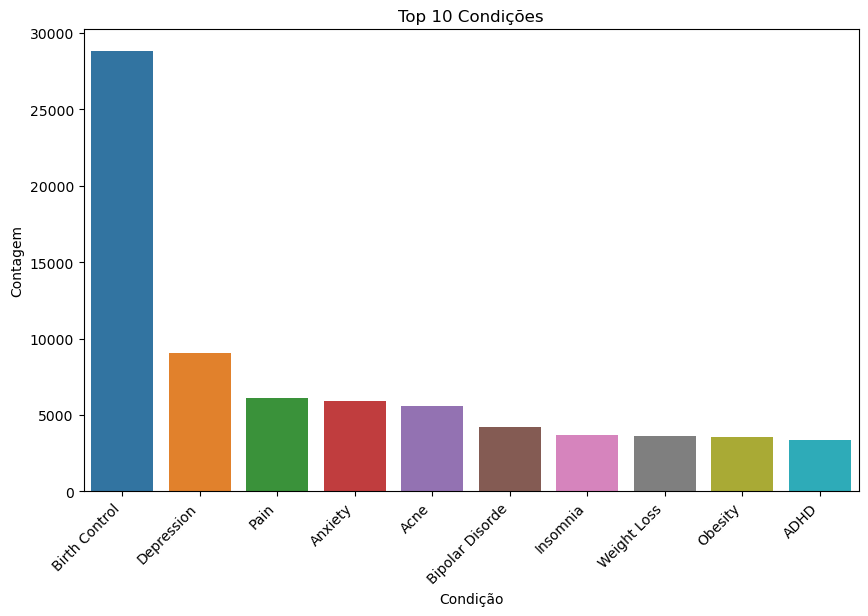

In [14]:
# Gráfico de barras das condições mais comuns no DF
top_conditions = df2["condition"].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_conditions.index, y=top_conditions.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Condição")
plt.ylabel("Contagem")
plt.title("Top 10 Condições")
plt.show()

## no grafico de barras acima podemos ver as top 10 condiçoes em nosso dataframe, podemos ver um numero expressivo de pacientes com a "condição" Birth Control, que seria o anticoncepcional, nesse caso não se trata de uma condição, mas sim de um metodo contraceptivo, apesar do Anticoncepcional ser muito importante na area da saude feminina, queremos Iniciar a nossa analise com uma doença com grande impacto na saude global, em segundo lugar, podemos observar que temos a depressão, uma doença que causa sofrimento não só aos pacientes, mas tambem a familiares e amigos proximos, vamos entender um pouco mais sobre a Depressão.

## Depressão:
A depressão é um transtorno mental que afeta milhões de pessoas em todo o mundo, sendo uma das condições de saúde mental mais prevalentes e debilitantes. Seu impacto na saúde global é significativo, abrangendo uma ampla gama de aspectos físicos, emocionais e sociais. A depressão não apenas causa sofrimento significativo aos indivíduos afetados, mas também gera um ônus substancial para os sistemas de saúde e a sociedade como um todo.

Em termos de saúde global, a depressão contribui significativamente para a carga global de doenças. Ela está associada a uma variedade de desafios de saúde, incluindo aumento do risco de outras condições médicas, como doenças cardiovasculares, diabetes e distúrbios do sono. Além disso, a depressão pode impactar negativamente o funcionamento cognitivo, as relações interpessoais e a qualidade de vida geral.

O sofrimento dos pacientes com depressão é multifacetado, abrangendo aspectos emocionais, comportamentais e físicos. Indivíduos que enfrentam a depressão muitas vezes experimentam sentimentos profundos de tristeza, desesperança e falta de interesse nas atividades cotidianas. A energia física pode ser reduzida, e as dificuldades de concentração e tomada de decisões podem se tornar desafios significativos. O isolamento social e o estigma associado à doença podem intensificar o sofrimento, tornando crucial o apoio e a compreensão da sociedade.

O tratamento e o acompanhamento médico desempenham um papel fundamental na gestão da depressão. Os antidepressivos, quando prescritos e monitorados por profissionais de saúde qualificados, têm se mostrado eficazes na redução dos sintomas depressivos e na melhoria da qualidade de vida dos pacientes. Além do uso de medicamentos, a terapia cognitivo-comportamental e outras abordagens psicoterapêuticas são frequentemente incorporadas ao plano de tratamento para proporcionar suporte emocional e estratégias de enfrentamento.

## Vamos fazer uma analise bivariada das rating (nota) e contagem útil (UsefulCount)

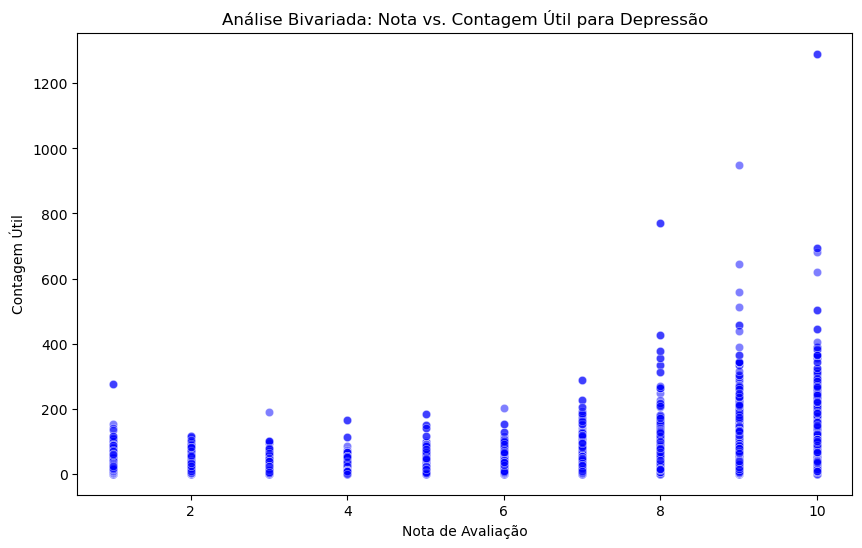

In [15]:
# Filtrar apenas as avaliações relacionadas à doença de depressão
df_depressao = df2[df2["condition"] == "Depression"]

# Criar um gráfico de dispersão para análise bivariada
plt.figure(figsize=(10, 6))
sns.scatterplot(x="rating", y="usefulCount", data=df_depressao, alpha=0.5, color='blue')
plt.title("Análise Bivariada: Nota vs. Contagem Útil para Depressão")
plt.xlabel("Nota de Avaliação")
plt.ylabel("Contagem Útil")
plt.show()

Nota-se que, em geral, os usuários tendem a considerar mais úteis as avaliações que possuem uma nota mais alta. Entretanto, observam-se outliers em notas bastante baixas. Isso ocorre porque algum usuário encontrou aquela avaliação negativa útil, pois destacava um ponto negativo do medicamento.

# dito isso, vamos analisar em nosso dataframe, quais são os medicamentos Mais usados para o tratamento dessa condição:

/var/folders/1r/d1x7h51s2jx9kv0jbv19wwd40000gn/T/ipykernel_1025/3539805834.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_depression = df2[df["condition"] == "Depression"]


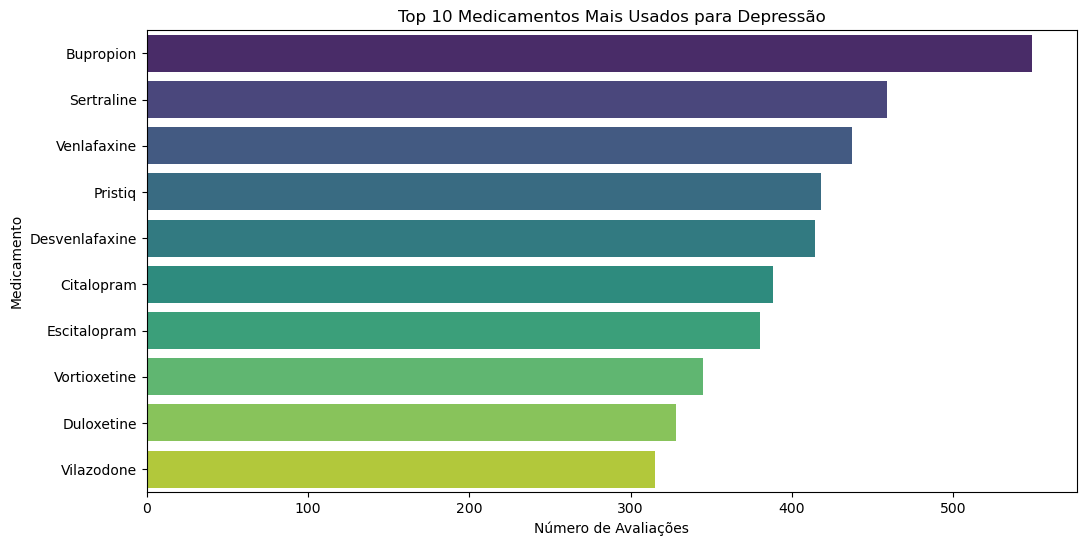

In [16]:
# Filtrar o DataFrame para incluir apenas a condição "Depression"
df_depression = df2[df["condition"] == "Depression"]

# Contar a frequência de cada medicamento
contagem_medicamentos = df_depression["drugName"].value_counts()

# Top 10 medicamentos mais usados
top_medicamentos_usados = contagem_medicamentos.head(10)

# Criar um gráfico de barras para os medicamentos mais usados
plt.figure(figsize=(12, 6))
sns.barplot(x=top_medicamentos_usados.values, y=top_medicamentos_usados.index, palette="viridis")
plt.xlabel("Número de Avaliações")
plt.ylabel("Medicamento")
plt.title("Top 10 Medicamentos Mais Usados para Depressão")
plt.show()


## Vemos que o Bupropion Possui o maior numero de avaliaçoes, o que significa que é o mais usado em nossa base para o tratamento da depressão, com isso, vamos entender por que esse medicamento é tão utilizado para tratar a depressão:

O Bupropion é um antidepressivo utilizado no tratamento da depressão. Ao agir no aumento dos níveis de norepinefrina e dopamina no cérebro, ele busca aliviar sintomas associados ao humor de forma eficaz. Disponível em diferentes formas, como comprimidos de liberação imediata e prolongada, o medicamento pode ser uma opção valiosa, especialmente em casos de depressão resistente. É importante que seu uso seja prescrito e monitorado por um profissional de saúde, considerando as características individuais de cada paciente. Além disso, o Bupropion também é empregado como auxílio na cessação do tabagismo, proporcionando suporte na redução dos sintomas de abstinência.

## porem, mesmo o Bupropion sendo a mais presente em nossa base, precisamos analisar as avaliaçoes dos pacientes, de modo a verificar a eficacia e nota da medicação, vamos utilizar outro grafico para visualizar:

/var/folders/1r/d1x7h51s2jx9kv0jbv19wwd40000gn/T/ipykernel_1025/89131592.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Bupropion = df2[(df["condition"] == "Depression") & (df["drugName"] == "Bupropion")]


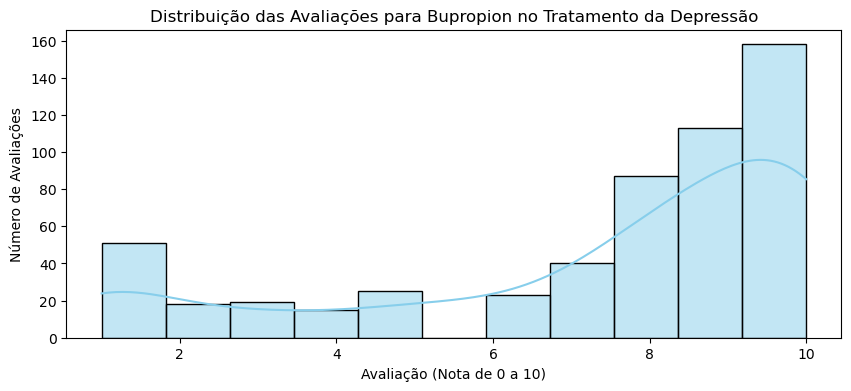

In [32]:
# Filtrar o DataFrame para incluir apenas a condição "Depression" e para o medicamento "Bupropion"
df_Bupropion = df2[(df["condition"] == "Depression") & (df["drugName"] == "Bupropion")]

# Criar um histograma das avaliações
plt.figure(figsize=(10, 4))
sns.histplot(df_Bupropion["rating"], bins=11, kde=True, color="skyblue")
plt.xlabel("Avaliação (Nota de 0 a 10)")
plt.ylabel("Número de Avaliações")
plt.title("Distribuição das Avaliações para Bupropion no Tratamento da Depressão")
plt.show()

## Com o Grafico Acima, podemos ver que a maior parte das notas estão entre 8 e 10 , o que confirma que a mediação Demonstra uma boa efetividade no tratamento da Depressão

## vamos ver agora quais são as primeiras 3 avaliações com mais numero na Coluna "Useful Count", o que significa que são as que os usuarios mais se identificaram ou acharam aquela avaliação Util

In [60]:
# Ordenar as avaliações pela coluna "usefulCount" em ordem decrescente
top_reviews_Bupropion = df_Bupropion.sort_values(by="usefulCount", ascending=False).head(3)

# Exibir as top 3 reviews com avaliação completa
for index, row in top_reviews_Bupropion.iterrows():
    print(f"Useful Count: {row['usefulCount']}\nReview: {row['review']}\n{'='*100}\n")

Useful Count: 389
Review: "I am a 35 year old woman, who has taken meds for 1/2 her life. I struggle with obsessive compulsive disorder, intrusive thoughts and overall depression. Wellbutrin.. I take 150mg a day. It has changed my life.. I have less obsessive thinking, more motivation and for some reason care way less about what people think."

Useful Count: 364
Review: "My husband had a long (undiagnosed) history of depression.  The final straw was when his brother died in December 07.  Declining for the next 5 months, withdrawing more and more, not wanting to work, go anywhere, short tempered, paranoid, until finally he attempted suicide (not the first time).  Doctor prescribed Wellbutrin 75mg 2 x daily for 3 months.  He&#039;s been a different person on the medicines. He says &quot;it makes him feel like he SHOULD feel, like he felt as a happy child, instead of what he&#039;s become over the years.&quot;  It helps with mood swings, helps him not overreact to small irritations anymor

## dada as 3 avaliações com a maior contagem util, vamos analisar a primeira, com mais pontuação de contagem Util, sendo de 389:

"Sou uma mulher de 35 anos que tomou remédios durante metade da vida. Eu luto contra transtorno obsessivo-compulsivo, pensamentos intrusivos e depressão geral. Wellbutrin.. Tomo 150mg por dia. Isso mudou minha vida. Tenho pensamentos menos obsessivos, mais motivação e, por algum motivo, me importo muito menos com o que as pessoas pensam."

### Vemos que essa paciente demonstra total satisfação com o tratamento com a Medicação, relatando ter mudado a vida dela, diminuindo pensamentos intrusivos e a depressão em Geral

## agora iremos mostrar no decorrer da nossa cobertura temporal, o aumento ou queda de notas do medicamento, isso nos dira se houve queda ou melhora na qualidade do remedio

/var/folders/1r/d1x7h51s2jx9kv0jbv19wwd40000gn/T/ipykernel_1025/1789591935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sertraline['year'] = df_sertraline['date'].dt.year


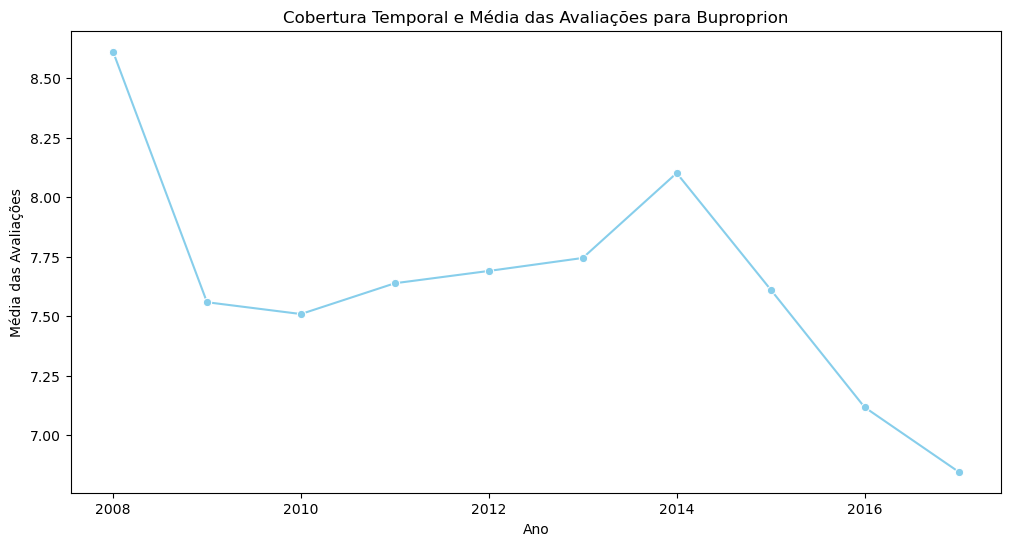

In [66]:
# Filtrar o DataFrame para incluir apenas o medicamento "Sertraline"
df_sertraline = df[df["drugName"] == "Bupropion"]

# Adicionar uma coluna para o ano
df_sertraline['year'] = df_sertraline['date'].dt.year

# Calcular a média das avaliações por ano
media_avaliacoes_por_ano = df_sertraline.groupby('year')['rating'].mean()

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x=media_avaliacoes_por_ano.index, y=media_avaliacoes_por_ano.values, marker='o', color='skyblue')
plt.xlabel("Ano")
plt.ylabel("Média das Avaliações")
plt.title("Cobertura Temporal e Média das Avaliações para Buproprion")
plt.show()

### com o grafico conseguimos ver que as notas se manteram estaveis entre 7.50 e 7.75 entre os anos de 2010 e 2013, no ano de 2014 houve um aumento nas notas mas logo depois apresentou uma queda para 7

## Agora iremos realizar uma analise de sentimento que mostrara uma nuvem de palavras mais utilizadas nas avaliaçoes do remedio

/var/folders/1r/d1x7h51s2jx9kv0jbv19wwd40000gn/T/ipykernel_1025/3372074268.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_medicamento_especificos = df2[(df["condition"] == "Depression") & (df["drugName"].isin(medicamento_especificos))]


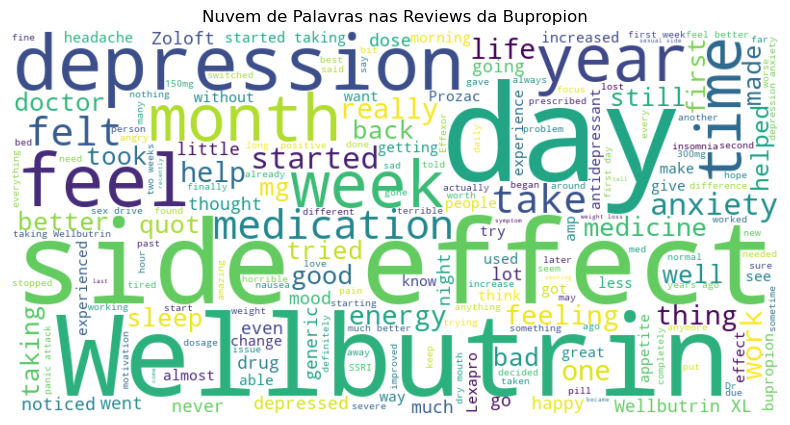

In [59]:
# Lista dos medicamentos específicos
medicamento_especificos = ["Bupropion"]

# Filtrar o DataFrame para incluir apenas a condição "Depression" e os medicamentos específicos
df_medicamento_especificos = df2[(df["condition"] == "Depression") & (df["drugName"].isin(medicamento_especificos))]

# Concatenar todas as reviews em uma única string
reviews_concatenadas = " ".join(df_medicamento_especificos["review"])

# Tokenização das palavras
tokens = word_tokenize(reviews_concatenadas)

# Remoção de stopwords
stop_words = set(stopwords.words("english"))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Criar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens))

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras nas Reviews da Bupropion")
plt.show()

Com essa nuvem de palavras podemos analisar as palavras chave, ditas frequentemente am avaliaçoes de pacientes, podemos perceber muitas palavras positivas relacionadas a medicação, como Better(melhor), Happy(feliz)m Energy(energia), great(otimo), porem tambem não podemos descartar palavras negativas que aparecem em texto maior em nossa nuvem de palavras, como Anxiety(ansiedade), side Effect(efeito colateral), week(fraco), headache(dor de cabeça), o que explica o grafico acima, esse medicamento apesar de bom para muitos pacientes, tambem pode causar diversos efeitos colaterais, o que faz com que suas avaliaçoes variem,de acordo com o paciente que esta tomando, por isso a importancia de realizar o acompanhamento medico

## Agora, Vamos analisar quais São os remedios Usados Para tratar a Depressão com as maiores Notas :

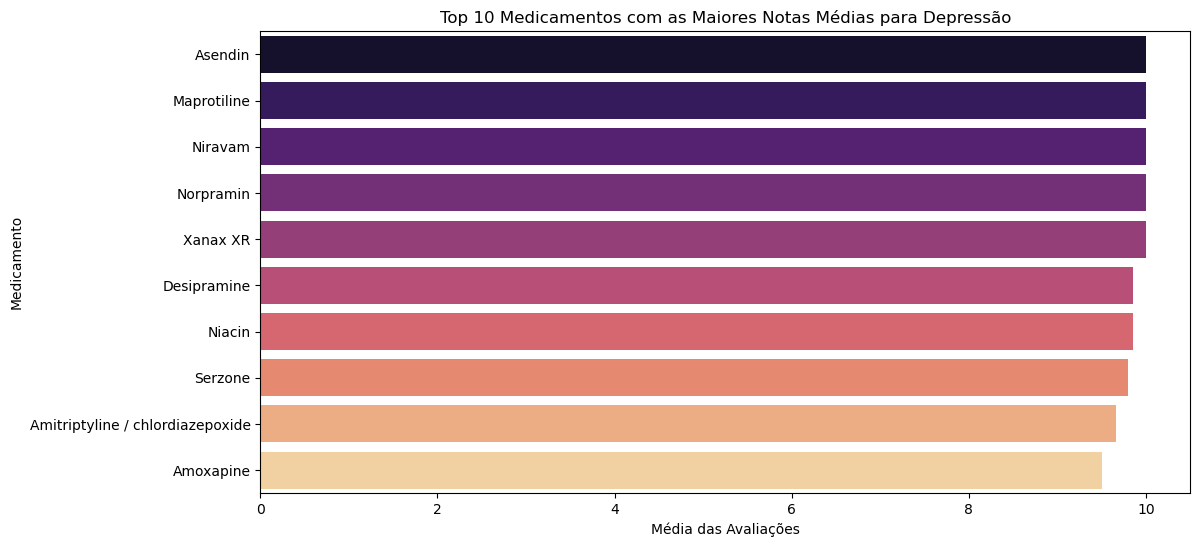

In [58]:
# Calcular a média das avaliações para cada medicamento
media_avaliacoes_medicamentos = df_depression.groupby("drugName")["rating"].mean()

# Top 10 medicamentos com as maiores notas médias
top_medicamentos_notas = media_avaliacoes_medicamentos.nlargest(10)

# Criar um gráfico de barras para os medicamentos com as maiores notas médias
plt.figure(figsize=(12, 6))
sns.barplot(x=top_medicamentos_notas.values, y=top_medicamentos_notas.index, palette="magma")
plt.xlabel("Média das Avaliações")
plt.ylabel("Medicamento")
plt.title("Top 10 Medicamentos com as Maiores Notas Médias para Depressão")
plt.show()

## Com o grafico, conseguimos ver que o medicamento Ascendin,  possue a nota maxima de 10, o que indica sua excelencia para o tratamento da condição, vamos Olhar uma avaliação escrita sobre o medicamento

In [63]:
# Ordenar as avaliações pela coluna "usefulCount" em ordem decrescente
top_reviews_Asendin = df_Asendin.sort_values(by="usefulCount", ascending=False).head(3)

# Exibir as top 3 reviews com avaliação completa
for index, row in top_reviews_Asendin.iterrows():
    print(f"Useful Count: {row['usefulCount']}\nReview: {row['review']}\n{'='*100}\n")

Useful Count: 59
Review: "I have used Asendin-amoxapine for at least 20 years off and on. After my last hospitalization for 7 months, I had been on Mirtazapine which I and many others gained 30 lbs from and unable to get it off.  So I am again on amoxapine and doing well and starting to lose weight finally.  It helps a great deal with anxiety, social ability and the feeling of being overwhelmed.  Great medicine.  I sometimes fear I wont be able to get it."



"Eu uso Asendin-amoxapina há pelo menos 20 anos intermitentemente. Após minha última hospitalização por 7 meses, eu estava tomando Mirtazapina, da qual eu e muitos outros ganhamos 30 libras e não conseguimos retirá-la. Então estou novamente tomando amoxapina e estou bem e finalmente começando a perder peso. Ajuda muito com a ansiedade, a capacidade social e a sensação de estar sobrecarregado. Ótimo remédio. Às vezes tenho medo de não conseguir."

### Isso mostra que pacientes acham o medicamento extremamente util, mas pode ser dificil de consegui-lo

## vamos tambem fazer a nuvem de palavras, para vizualizar palavras-chave:

/var/folders/1r/d1x7h51s2jx9kv0jbv19wwd40000gn/T/ipykernel_1025/626048533.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_medicamento_especifico = df2[(df["condition"] == "Depression") & (df["drugName"].isin(medicamentos_especificos))]


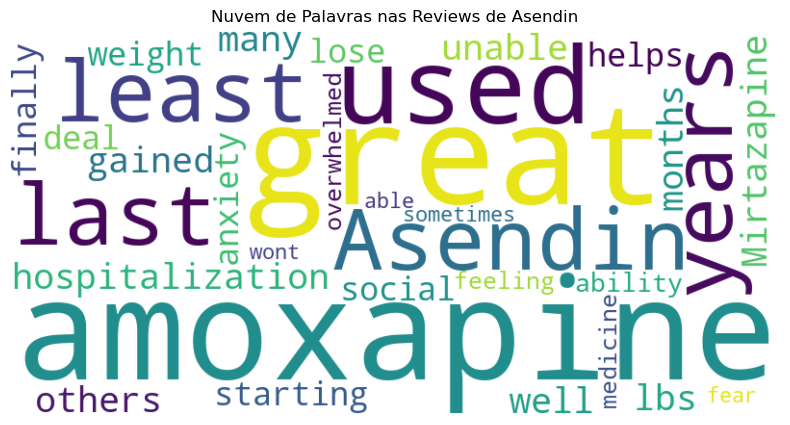

In [62]:
# Lista dos medicamentos específicos
medicamento_especifico = ["Asendin"]
# Filtrar o DataFrame para incluir apenas a condição "Depression" e os medicamentos específicos
df_medicamento_especifico = df2[(df["condition"] == "Depression") & (df["drugName"].isin(medicamentos_especificos))]

# Concatenar todas as reviews em uma única string
reviews_concatenadas = " ".join(df_medicamento_especifico["review"])

# Tokenização das palavras
tokens = word_tokenize(reviews_concatenadas)

# Remoção de stopwords
stop_words = set(stopwords.words("english"))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Criar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens))

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras nas Reviews de Asendin")
plt.show()

### Vemos que nessa nuvem temos palavras positivas em relevancia como:  Great(Otimo), helps(ajuda), mas tambem tem palavras negativas como:  Weight(Peso),Fear(medo), Overwelmed(Sobre- carregado)  o que demonstra que mesmo sendo o remedio com a nota mais alta, alguns pacientes podem não se adaptar, pois cada individuo possui um organismo diferente, mas no geral podemos concluir que essa é uma boa Medicação para o tratamento da depressão.

## Agora, vamos avaliar os 10 medicamentos com as piores notas médias para a depressão.

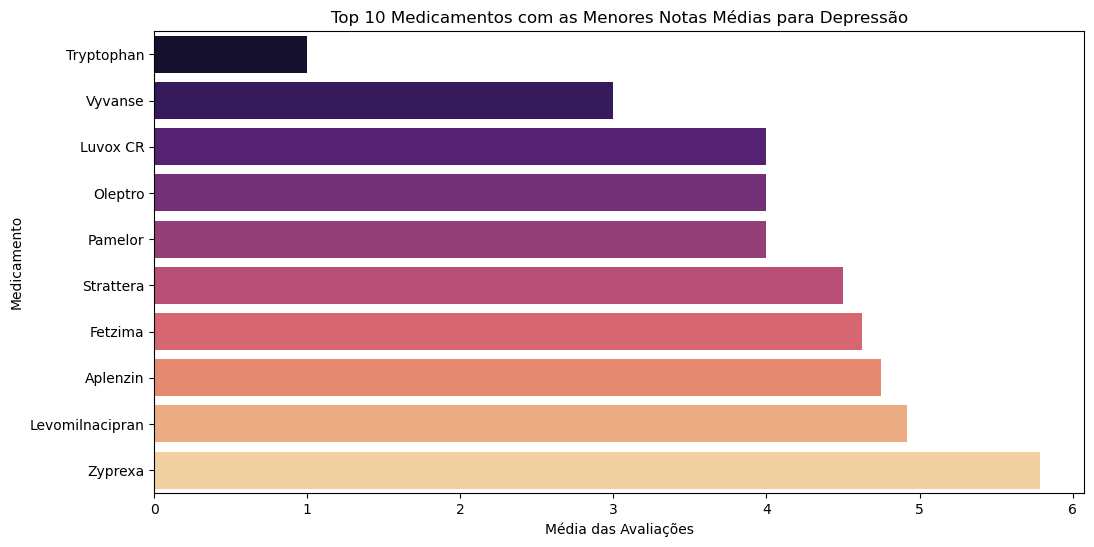

In [56]:
# Calcular a média das avaliações para cada medicamento
media_avaliacoes_medicamentos = df_depression.groupby("drugName")["rating"].mean()

# Top 10 medicamentos com as menores notas médias
bottom_medicamentos_notas = media_avaliacoes_medicamentos.nsmallest(10)

# Criar um gráfico de barras para os medicamentos com as menores notas médias
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_medicamentos_notas.values, y=bottom_medicamentos_notas.index, palette="magma")
plt.xlabel("Média das Avaliações")
plt.ylabel("Medicamento")
plt.title("Top 10 Medicamentos com as Menores Notas Médias para Depressão")
plt.show()

Como é possível perceber, o Tryptophan exibe a avaliação média mais baixa entre os medicamentos utilizados no tratamento da depressão.

## Agora, procederemos com uma análise de sentimento que revelará as palavras mais frequentemente utilizadas nas avaliações do medicamento Tryptophan.

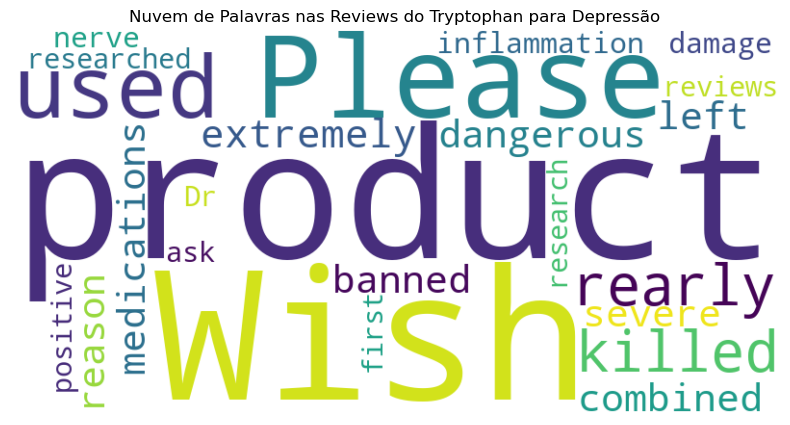

In [55]:
# Lista dos medicamentos específicos
medicamento_especificos = ["Tryptophan"]

# Filtrar o DataFrame para incluir apenas a condição "Depression" e os medicamentos específicos
df_medicamento_especificos = df2[(df2["condition"] == "Depression") & (df2["drugName"].isin(medicamento_especificos))]

# Concatenar todas as reviews em uma única string
reviews_concatenadas = " ".join(df_medicamento_especificos["review"])

# Tokenização das palavras
tokens = word_tokenize(reviews_concatenadas)

# Remoção de stopwords
stop_words = set(stopwords.words("english"))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Criar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens))

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras nas Reviews do Tryptophan para Depressão")
plt.show()

Como podemos perceber, há poucas palavras para análise, o que se deve à baixa quantidade de avaliações associadas a esse medicamento.

In [40]:
# Filtrar o DataFrame para incluir apenas a condição "Depression" e para o medicamento "Tryptophan"
df_Tryptophan = df2[(df["condition"] == "Depression") & (df["drugName"] == "Tryptophan")]

/var/folders/1r/d1x7h51s2jx9kv0jbv19wwd40000gn/T/ipykernel_1025/1458284944.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Tryptophan = df2[(df["condition"] == "Depression") & (df["drugName"] == "Tryptophan")]


In [54]:
# Ordenar as avaliações pela coluna "usefulCount" em ordem decrescente
top_reviews_Tryptophan = df_Tryptophan.sort_values(by="usefulCount", ascending=False).head(3)

# Exibir as top 3 reviews com avaliação completa
for index, row in top_reviews_Tryptophan .iterrows():
    print(f"Useful Count: {row['usefulCount']}\nReview: {row['review']}\n{'='*100}\n")

Useful Count: 5
Review: "I used this product and it rearly killed me.. is extremely dangerous combined with other medications and was banned for a reason. Now left with severe inflammation and nerve damage. Wish I&#039;d researched further not just product reviews which are only positive.  Please please ask your Dr first or research. Wish I had...."



### traduzindo a avaliação, temos um relato extremamente negativo do paciente:

"Usei este produto e quase me matou. É extremamente perigoso combinado com outros medicamentos e foi proibido por um motivo. Agora ficou com inflamação grave e danos nos nervos. Gostaria de ter pesquisado mais, não apenas análises de produtos que são apenas positivas. Por favor, pergunte primeiro ao seu médico ou pesquise. Eu gostaria de ter...."
### Com isso, Concluimos que esse medicamento é extremamente perigoso e não recomendado entre os pacientes

## Texto de Conclusão 

A análise dos dados sobre medicamentos para o tratamento da depressão revelou insights valiosos sobre a percepção dos pacientes em relação à eficácia e aceitação desses tratamentos. A depressão é uma condição de saúde mental prevalente e debilitante globalmente, e a escolha do medicamento adequado desempenha um papel crucial no gerenciamento dessa condição.

Bupropion, destacou-se como o medicamento mais utilizado para tratar a depressão em nossa base de dados. Sua popularidade pode ser atribuída ao seu mecanismo de ação eficaz, perfil de segurança favorável, administração conveniente e uma vasta experiência clínica respaldando sua eficácia.

Ao examinar as avaliações específicas para o Bupropion, observamos que a maioria das notas estava na faixa de 8 a 10, indicando uma boa efetividade percebida pelos pacientes. As revisões mais úteis destacaram a melhoria significativa na qualidade de vida.

Além do Bupropion, identificamos outros medicamentos, como Asindin, que recebeu a maior nota média (10). Esse medicamento também parece ser  eficaz, de acordo com a avaliação dos pacientes.

em contraPartida, pudemos verificar que o medicamento Tryptophan não apresentou bons resultados no tratamento da Doença, causando muitos efeitos colaterais nos pacientes.

A análise temporal revelou que a partir do ano de 2014, o numero de avaliações cresceram, o que indica um aumento no mercado farmaceutico e avanço da tecnologia para melhor captura das avaliações

Esta análise destaca a importância de considerar a perspectiva do paciente e a variedade de opiniões ao avaliar a eficácia dos medicamentos. A saúde mental é uma área complexa e multidimensional, e a colaboração entre pacientes, profissionais de saúde e pesquisadores é fundamental para melhorar continuamente as opções de tratamento disponíveis.